In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df['Age'] = 2023 - df['Year']
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [6]:
df.drop(columns=['Year'], inplace=True)

In [7]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


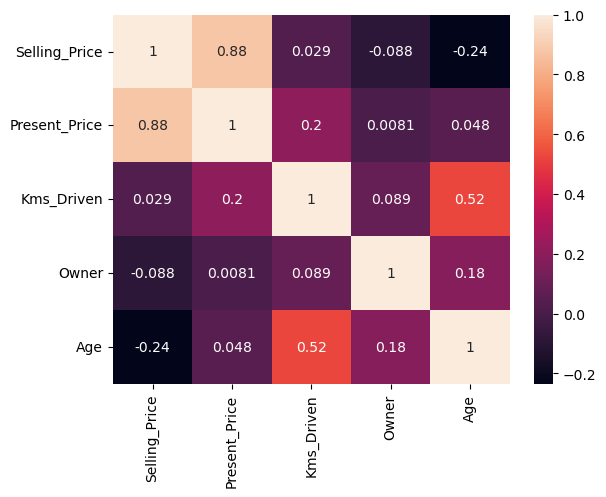

In [8]:
sns.heatmap(df.corr(), annot = True);

In [9]:
for i in df.select_dtypes(include='object').columns:
    print(i,'...........',df[i].unique(),'..........',df[i].nunique())

Car_Name ........... ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Str

# Applying hot encoding because it is a nominal data

In [10]:
df1 = pd.get_dummies(df,columns = ['Fuel_Type', 'Seller_Type','Transmission'], drop_first = True)


# drop_first = True removes the first value 
# for example there are 3 fuel types petrol, diesel, cng
# but since cng is represented by 0, we can drop the column for cng as it is understandable that the column with 
# all the value zero is cng


# Similar concept is working in other columns like seller type and transmission

In [11]:
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2.85,4.15,5200,0,12,0,1,0,1
4,swift,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,7,1,0,0,1
297,brio,4.00,5.90,60000,0,8,0,1,0,1
298,city,3.35,11.00,87934,0,14,0,1,0,1
299,city,11.50,12.50,9000,0,6,1,0,0,1


In [12]:
df1['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [13]:
df1.shape

(301, 10)

# Applying mean value target encoding because there are so many categories in car_name column and hence we cannot use one hot encoding here because dimensionality would increase

In [14]:
df2 = df1.groupby(['Car_Name'])['Selling_Price'].agg(['mean']).reset_index()
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [15]:
df3 = pd.merge(df1,df2, on='Car_Name')
df3

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,mean
0,ritz,3.35,5.59,27000,0,9,0,1,0,1,2.862500
1,ritz,3.10,5.98,51439,0,11,1,0,0,1,2.862500
2,ritz,2.35,4.89,54200,0,12,0,1,0,1,2.862500
3,ritz,2.65,4.89,64532,0,10,0,1,0,1,2.862500
4,sx4,4.75,9.54,43000,0,10,1,0,0,1,3.158333
...,...,...,...,...,...,...,...,...,...,...,...
296,jazz,2.25,7.50,61203,0,13,0,1,0,1,5.828571
297,jazz,6.00,8.40,4000,0,7,0,1,0,1,5.828571
298,jazz,7.40,8.50,15059,0,7,0,1,0,0,5.828571
299,jazz,5.65,7.90,28569,0,7,0,1,0,1,5.828571


# Seggrigating x and y

In [16]:
x = df3.drop(columns=["Selling_Price", "Car_Name"])
y = df3['Selling_Price']

In [17]:
x

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,mean
0,5.59,27000,0,9,0,1,0,1,2.862500
1,5.98,51439,0,11,1,0,0,1,2.862500
2,4.89,54200,0,12,0,1,0,1,2.862500
3,4.89,64532,0,10,0,1,0,1,2.862500
4,9.54,43000,0,10,1,0,0,1,3.158333
...,...,...,...,...,...,...,...,...,...
296,7.50,61203,0,13,0,1,0,1,5.828571
297,8.40,4000,0,7,0,1,0,1,5.828571
298,8.50,15059,0,7,0,1,0,0,5.828571
299,7.90,28569,0,7,0,1,0,1,5.828571


In [18]:
y

0      3.35
1      3.10
2      2.35
3      2.65
4      4.75
       ... 
296    2.25
297    6.00
298    7.40
299    5.65
300    6.40
Name: Selling_Price, Length: 301, dtype: float64

In [19]:
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [20]:
# Splitting the data into train and test data with 20% test data

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state=1)

In [22]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(240, 9) (240,)
(61, 9) (61,)


In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
lr.intercept_

4.721236852651023

In [27]:
lr.coef_

array([ 2.59498195, -0.21547568, -0.12611221, -1.11501798,  0.5984598 ,
        0.06957397, -0.33508776, -0.56152855,  1.47914952])

In [28]:
y_pred_train = lr.predict(x_train)

In [29]:
r2_score(y_train, y_pred_train)

0.8953609310011851

In [30]:
y_pred_test = lr.predict(x_test)

In [31]:
r2_score(y_test, y_pred_test)

0.8935066832547844